# Engineering features for a model from train set

In [1]:
# Import Libraries
# Data
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import random
from datetime import datetime, timedelta

from copy import deepcopy

#Viz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(font='Helvetica') # Futura? Calibri Light? 
sns.set_style("white")
sns.set_theme(style='ticks')
sns.set_context('talk')

In [2]:
from statsmodels.graphics import tsaplots

## Import training data

In [24]:
path = 'C:/mie1628_big_data/assignment_5/cloud_ml_proj/data/train_set_2018_01_01_01_2022_09_16_06.csv'
train_set = pd.read_csv(path, index_col=0)
train_set.index = pd.DatetimeIndex(train_set.index)
train_set = train_set

In [25]:
train_set.columns

Index(['hourly_price', 'or_10s', 'or_10ns', 'or_30', 'Hour', 'market_demand',
       'ont_demand', 'Imp', 'Exp', 'Flow', 'Imp.1', 'Exp.1', 'Flow.1', 'Imp.2',
       'Exp.2', 'Flow.2', 'Imp.3', 'Exp.3', 'Flow.3', 'Imp.4', 'Exp.4',
       'Flow.4', 'Imp.5', 'Exp.5', 'Flow.5', 'Imp.6', 'Exp.6', 'Flow.6',
       'Imp.7', 'Exp.7', 'Flow.7', 'Imp.8', 'Exp.8', 'Flow.8', 'Imp.9',
       'Exp.9', 'Flow.9', 'Imp.10', 'Exp.10', 'Flow.10', 'Imp.11', 'Exp.11',
       'Flow.11', 'Imp.12', 'Exp.12', 'Flow.12', 'Imp.13', 'Exp.13', 'Flow.13',
       'Imp.14', 'Exp.14', 'Flow.14', 'Year', 'Month', 'Day', 'max_t', 'min_t',
       'mean_t', 'hdd', 'cdd', 'tot_rain', 'Total Snow (cm)', 'tot_precip',
       'gust_dir', 'gust_speed'],
      dtype='object')

## Time series features and autocorrelation

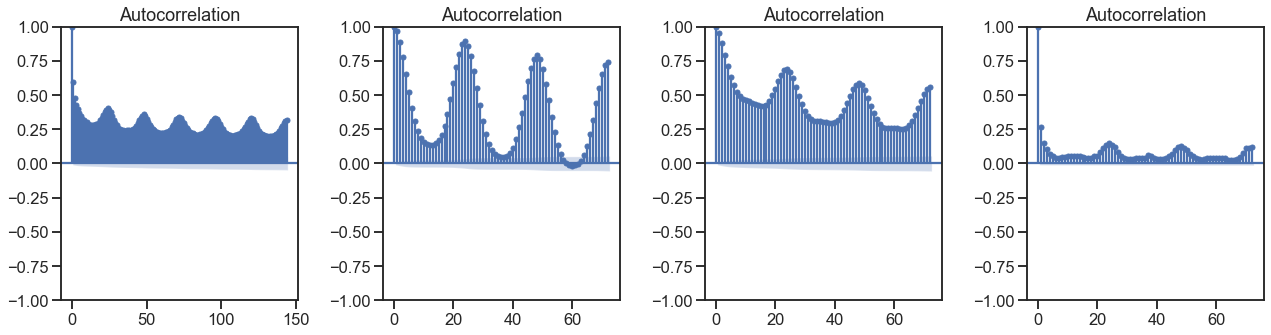

In [39]:
fig, ax = plt.subplots(1,4, figsize=(18,5))
#plot autocorrelation function
tsaplots.plot_acf(train_set['hourly_price'], lags=144, ax=ax[0])
tsaplots.plot_acf(train_set['ont_demand'], lags=72, ax=ax[1])
tsaplots.plot_acf(train_set['Flow.14'], lags=72, ax=ax[2])
tsaplots.plot_acf(train_set['or_10ns'], lags=72, ax=ax[3])

plt.tight_layout()

0.36038752504827176

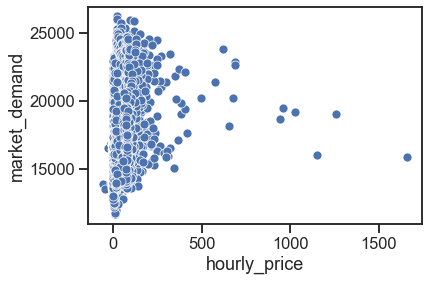

In [56]:
sns.scatterplot(x=train_set['hourly_price'], y=train_set['market_demand'].shift(-24))
train_set['hourly_price'].corr(train_set['market_demand'].shift(-24))

## Weather features

## Other features